<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/SpacecraftAttitude_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

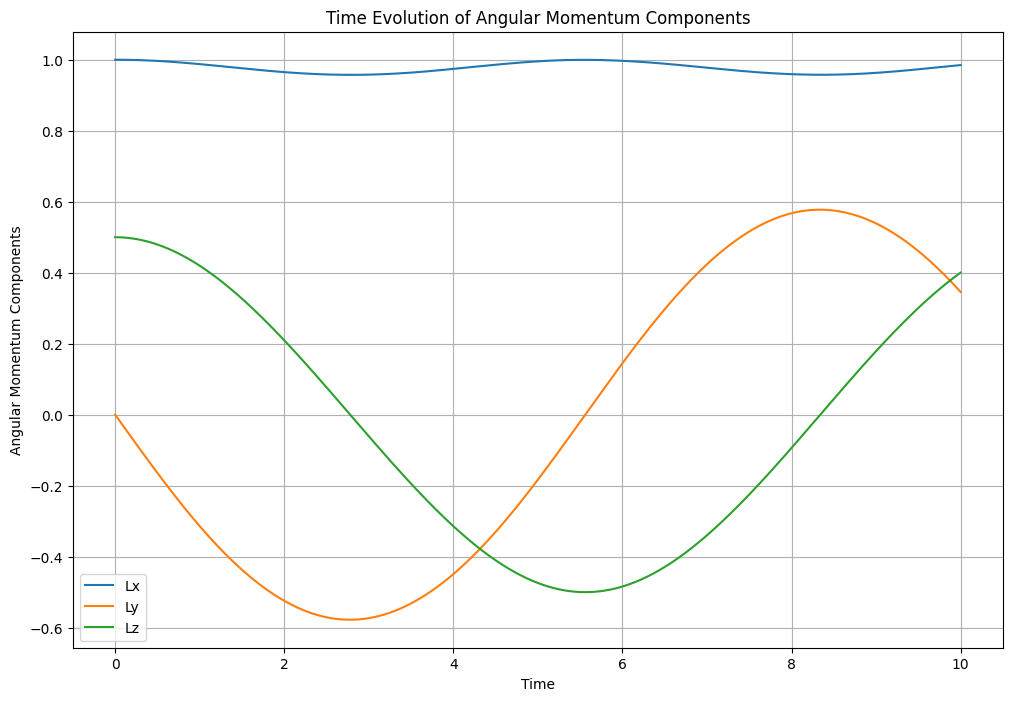

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the moments of inertia
I_x = 1.0
I_y = 2.0
I_z = 3.0

# Define the initial conditions for Lx, Ly, Lz
Lx0 = 1.0
Ly0 = 0.0
Lz0 = 0.5

# Define the equations of motion
def equations_of_motion(t, L):
    Lx, Ly, Lz = L
    dLx_dt = (Ly * Lz * (I_z - I_y)) / (I_y * I_z)
    dLy_dt = (Lz * Lx * (I_x - I_z)) / (I_z * I_x)
    dLz_dt = (Lx * Ly * (I_y - I_x)) / (I_x * I_y)
    return [dLx_dt, dLy_dt, dLz_dt]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Initial conditions vector
L0 = [Lx0, Ly0, Lz0]

# Solve the equations of motion
sol = solve_ivp(equations_of_motion, t_span, L0, t_eval=t_eval)

# Extract the results
Lx = sol.y[0]
Ly = sol.y[1]
Lz = sol.y[2]
time = sol.t

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(time, Lx, label='Lx')
plt.plot(time, Ly, label='Ly')
plt.plot(time, Lz, label='Lz')
plt.xlabel('Time')
plt.ylabel('Angular Momentum Components')
plt.title('Time Evolution of Angular Momentum Components')
plt.legend()
plt.grid()
plt.show()


This exercise will involve setting up the equations of motion using Poisson brackets and then solving these equations using Python.

Exercise: Spacecraft Attitude Control
Problem Statement
A spacecraft has a gyroscope system to control its orientation in space. The spacecraft's angular momentum vector components are
𝐿
𝑥
L
x
​
 ,
𝐿
𝑦
L
y
​
 , and
𝐿
𝑧
L
z
​
 , and the principal moments of inertia are
𝐼
𝑥
I
x
​
 ,
𝐼
𝑦
I
y
​
 , and
𝐼
𝑧
I
z
​
 . The Hamiltonian of the system is given by:

𝐻
=
1
2
(
𝐿
𝑥
2
𝐼
𝑥
+
𝐿
𝑦
2
𝐼
𝑦
+
𝐿
𝑧
2
𝐼
𝑧
)
H=
2
1
​
 (
I
x
​

L
x
2
​

​
 +
I
y
​

L
y
2
​

​
 +
I
z
​

L
z
2
​

​
 )
Derive the equations of motion for the angular momentum components
𝐿
𝑥
L
x
​
 ,
𝐿
𝑦
L
y
​
 , and
𝐿
𝑧
L
z
​
  using the Poisson brackets.
Solve these equations numerically using Python to simulate the spacecraft's attitude over time.
Plot the time evolution of the angular momentum components.
Derivation of Equations of Motion
Using the Poisson bracket definition:

{
𝐿
𝑖
,
𝐿
𝑗
}
=
𝜖
𝑖
𝑗
𝑘
𝐿
𝑘
{L
i
​
 ,L
j
​
 }=ϵ
ijk
​
 L
k
​

The time evolution of
𝐿
𝑖
L
i
​
  is given by:

𝑑
𝐿
𝑖
𝑑
𝑡
=
{
𝐿
𝑖
,
𝐻
}
dt
dL
i
​

​
 ={L
i
​
 ,H}
For each component, the equations of motion are:

𝑑
𝐿
𝑥
𝑑
𝑡
=
𝐿
𝑦
𝐿
𝑧
𝐼
𝑦
𝐼
𝑧
(
𝐼
𝑧
−
𝐼
𝑦
)
dt
dL
x
​

​
 =
I
y
​
 I
z
​

L
y
​
 L
z
​

​
 (I
z
​
 −I
y
​
 )

𝑑
𝐿
𝑦
𝑑
𝑡
=
𝐿
𝑧
𝐿
𝑥
𝐼
𝑧
𝐼
𝑥
(
𝐼
𝑥
−
𝐼
𝑧
)
dt
dL
y
​

​
 =
I
z
​
 I
x
​

L
z
​
 L
x
​

​
 (I
x
​
 −I
z
​
 )

𝑑
𝐿
𝑧
𝑑
𝑡
=
𝐿
𝑥
𝐿
𝑦
𝐼
𝑥
𝐼
𝑦
(
𝐼
𝑦
−
𝐼
𝑥
)
dt
dL
z
​

​
 =
I
x
​
 I
y
​

L
x
​
 L
y
​

​
 (I
y
​
 −I
x
​
 )